In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# 特定の料理ごとにオリーブオイルを使った方がつくレポ数が増えるか分析・評価する

In [2]:
year = []
for i in range(1998, 2015):
    year.append(i)

col_names_recipe = ["recipe_id", "name"]
col_names_ingredient = ["recipe_id", "ingredient"]

true_array = [[], [], [], [], []]
false_array = [[], [], [], [], []]

dish_name = ["salad", "pasta", "doria", "pizza", "carpaccio"]

In [3]:
bar_1 = tqdm(total=(len(year)-1)*2)

report = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/report 2/report{1998}.csv",
                     names=["recipe_id"], usecols=[0])

for i in range(1999, 2015):
    # reportファイルを読み込む
    report_temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/report 2/report{i}.csv",
                              names=["recipe_id"], usecols=[0])
    bar_1.update(1)

    report = pd.concat([report, report_temp])

    bar_1.update(1)

vc = report['recipe_id'].value_counts()

100%|██████████| 32/32 [00:19<00:00,  1.52it/s]

In [4]:
vc

870e7d67f777deb83dd6e474105ceaec301e092c    15654
348d4507f1a9b0d1c425762dbe0395c55a58a7b8    12241
169b17ce6e2b6981909a901da070ea1de2626e89    11196
70bf8a76730cf3c0568443ca5a1f93d203fca6b7     9687
d5c52cfc106b8fc65f6ea77f96b10a7018df65a1     7867
                                            ...  
e5991692c933b78047c3086d41b1b47e619eb1c6        1
fd2bc34fa6b1d957ddb17eaeca0d7a8551d3f1f4        1
175a8f0b73d00d5b77f5da03b83a40997cfc8f22        1
9fdca7eeb0a4daef970b704accbc4746dd1db0a3        1
e54409e2c19dec5f542db2df4f929e01d4f5b59f        1
Name: recipe_id, Length: 805016, dtype: int64

In [5]:
bar_2 = tqdm(total=17*3)
for i in year:
    # recipeファイルを読み込む
    recipe = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/recipe/recipe{i}.csv",
                            names=col_names_recipe, usecols=[0, 2])
    recipe.dropna(inplace=True)

    # 特定の料理を抽出する
    salad = recipe.query('name.str.contains("サラダ|さらだ")', engine="python")
    pasta = recipe.query('name.str.contains("パスタ|スパゲッティ｜スパゲティ|ペンネ|ペペロンチーノ|カルボナーラ|ボロネーゼ")', engine="python")
    doria = recipe.query('name.str.contains("ドリア|グラタン|リゾット")', engine="python")
    pizza = recipe.query('name.str.contains("ピザ|ピッザ|ピッツァ")', engine="python")
    carpaccio = recipe.query('name.str.contains("カルパッチョ|かるぱっちょ")', engine="python")

    dish_array = [salad, pasta, doria, pizza, carpaccio]


    # ingredientファイルを読み込む
    ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                             names=col_names_ingredient, usecols=[0, 1])

    # ingredientからオリーブオイルの行だけ抽出する
    ingredient_olive = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]


    # オリーブオイルを使ったレシピだけで料理とingredientを結合
    # recipe_idだけ必要なので、オリーブオイルのデータは削除する
    # 差を求めて、オリーブオイルを使っていないrecipe_idのデータセットも作成する
    # _tはオリーブオイルを使っていることを示し（true）、_fは使っていないことを示す（false）

    for j in range(len(dish_array)):
        dish_array[j] = pd.merge(dish_array[j], ingredient_olive, on="recipe_id", how="left")
        dish_array[j] = dish_array[j].assign(report_qty=0)

    bar_2.update(1)

    for j in range(len(dish_array)):
        for k in range(len(dish_array[j])):
            try:
                dish_array[j]["report_qty"][k] = vc[dish_array[j]["recipe_id"][k]]
            except:
                continue

    bar_2.update(1)

    true_index = [[], [], [], [], []]
    false_index = [[], [], [], [], []]


    for j in range(len(dish_array)):
        for k in range(len(dish_array[j])):
            if type(dish_array[j]['ingredient'][k]) == float:
                false_index[j].append(k)
            else:
                true_index[j].append(k)
        true_array[j] = np.append(true_array[j], dish_array[j].iloc[true_index[j], [3]].values.T)
        false_array[j] = np.append(false_array[j], dish_array[j].iloc[false_index[j], [3]].values.T)

    bar_2.update(1)


100%|██████████| 51/51 [00:39<00:00,  1.28s/it]

In [6]:
sample_size_true = [len(true_array[i]) for i in range(len(true_array))]
sample_size_false = [len(false_array[i]) for i in range(len(false_array))]

In [7]:
total_size_true = 0
total_size_false = 0
for i in range(len(sample_size_false)):
    total_size_true += sample_size_true[i]
    total_size_false += sample_size_false[i]

In [8]:
points = [(true_array[i], false_array[i]) for i in range(len(dish_array))]

In [9]:
total_true = true_array[0]
total_false = false_array[0]
for i in range(1, len(dish_array)):
    total_true = np.append(total_true, true_array[i])
    total_false = np.append(total_false, false_array[i])
total_points = (total_true, total_false)

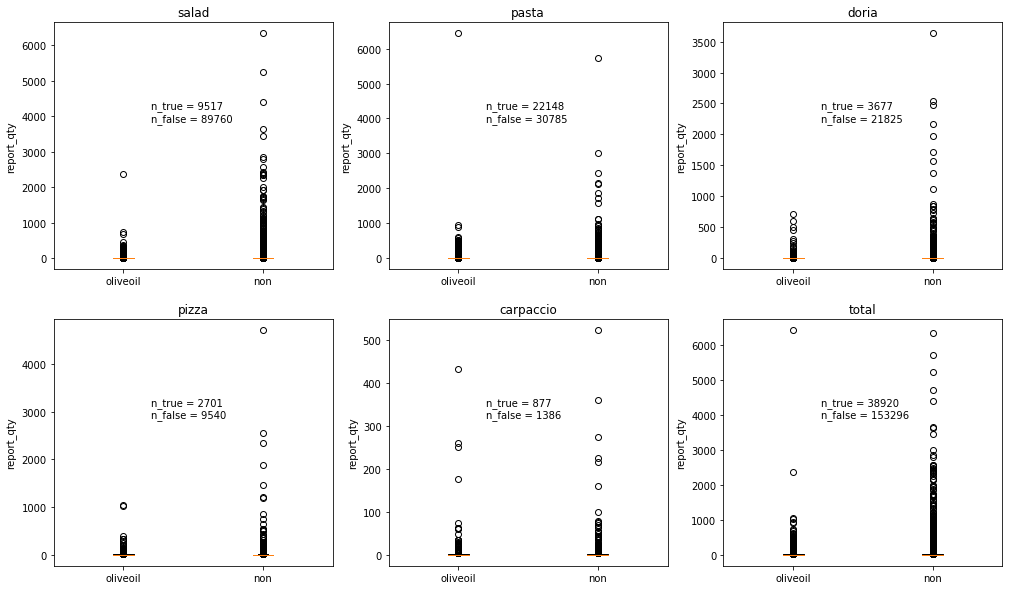

In [10]:
fig = plt.figure(figsize=(17.0, 10.0))

for i in range(len(dish_array)):
    ax = fig.add_subplot(2, 3, i+1)
    bp = ax.boxplot(points[i])
    ax.set_xticklabels(["oliveoil", "non"])
    ax.text(0.35, 0.60, f"n_true = {sample_size_true[i]}\nn_false = {sample_size_false[i]}", size = 10, transform=ax.transAxes)
    plt.title(dish_name[i])
    plt.ylabel("report_qty")

ax = fig.add_subplot(2, 3, 6)
bp = ax.boxplot(total_points)
ax.set_xticklabels(["oliveoil", "non"])
ax.text(0.35, 0.60, f"n_true = {total_size_true}\nn_false = {total_size_false}", size = 10, transform=ax.transAxes)
plt.title("total")
plt.ylabel("report_qty")

plt.savefig("mokomichi_popular.png")

In [11]:
max(true_array[0])

2368.0

In [22]:
len(true_array[0])

9517

オリーブオイルの有無で分布が異なるか統計的に評価する

In [23]:
from scipy import stats

In [56]:
words = ["サラダ     ", "パスタ     ", "ドリア     ", "ピザ       ", "カルパッチョ", "合計       "]

分布が未知なのでコロモゴロフ・スミルノフ検定を行う

In [57]:
print("KS検定（有意水準1%）")
print("________________")
for i in range(len(true_array)):
    p = stats.ks_2samp(true_array[i], false_array[i]).pvalue
    if p < 0.01:
        print("{0}： p値={1:.7f} 　=> 棄却".format(words[i], p))
    else:
        print("{0}： p値={1:.7f} 　=> 採択".format(words[i], p))
p = stats.ks_2samp(total_true, total_false).pvalue
if p < 0.01:
    print("{0}： p値={1:.7f} 　=> 棄却".format(words[5], p))
else:
    print("{0}： p値={1:.7f} 　=> 採択".format(words[5], p))

KS検定（有意水準1%）
________________
サラダ     ： p値=0.0000000 　=> 棄却
パスタ     ： p値=0.0000031 　=> 棄却
ドリア     ： p値=0.0956745 　=> 採択
ピザ       ： p値=1.0000000 　=> 採択
カルパッチョ： p値=0.9852524 　=> 採択
合計       ： p値=0.0000000 　=> 棄却


様々な種類がある料理（サラダやパスタ）ほどオリーブオイルを使うとつくレポ数が減少する傾向がみられる

In [59]:
# 平均値の比較
for i in range(len(points)):
    print(np.mean(true_array[i]), np.mean(false_array[i]))

3.3173268887254386 5.1303921568627455
3.355968936247065 4.261263602403768
3.17106336687517 4.4969988545246276
4.597186227323213 5.326100628930818
3.0205245153933866 3.341991341991342
